In [1]:
# Module importieren

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Daten in pd einlesen
data = pd.read_csv("antibody1.dat", header = None)
data.head(4) 

# Data Wrangling
data = data[0].str.split("\\t", expand=True)
header = data.iloc[0]
data.columns = header
data = data.iloc[1:-1]
data.reset_index(drop = True)
data["TtrVol"] = data["TtrVol"].astype(float)

data.sort_values("TtrVol", ascending = False)

data["RadDos"] = data["RadDos"].astype(int)
data["RadDos"] = data["RadDos"].map({-1:0, 1:1})
data

# Whack Datesatz....

,CelNum,VolPrs,Prime1,RadDos,Growth,Prime2,TtrVol
1,-1,-1,-1,0,-1,-1,70.0
2,1,-1,-1,0,1,-1,150.0
3,-1,1,-1,0,1,1,34.0
4,1,1,-1,0,-1,1,32.0
5,-1,-1,1,0,1,1,137.5
6,1,-1,1,0,-1,1,56.0
7,-1,1,1,0,-1,-1,123.0
8,1,1,1,0,1,-1,225.0
9,-1,-1,-1,1,-1,1,50.0
10,1,-1,-1,1,1,1,2.7


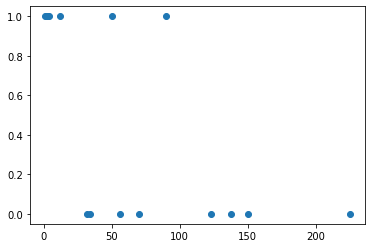

In [3]:
# x und y werte definieren
x = data["TtrVol"].values.reshape(-1,1)
y = data["RadDos"].values

# Scatterplot
plt.scatter(x,y)
plt.show()

In [4]:
# Trainings und Test Daten generieren sowie Datensatz anpassen
train, test = train_test_split(data, test_size = 0.3)

x_train = train["TtrVol"].values.reshape(-1,1)
y_train = train["RadDos"].values

x_test = test["TtrVol"].values.reshape(-1,1)
y_test = test["RadDos"].values

In [5]:
# Logistisches Regressions Model erstellen mit Trainingsdaten
model = LogisticRegression().fit(x_train, y_train)

In [6]:
# Confusions Matrix erstellen / Auswerten
y_predict_test = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predict_test)

# Confusins Matrix
print(conf_matrix)

# Auswertung 1
true_positiv = conf_matrix[0][0]
true_negativ = conf_matrix[1][1]

false_positiv = conf_matrix[1][0]
false_negativ = conf_matrix[0][1]

true_pred = true_positiv + true_negativ
false_pred = false_positiv + false_negativ

correct_predict = true_pred / (false_pred + true_pred)
print(correct_predict)

# Auswertung 2 
correct_prediction = model.score(x_test, y_test)
print(correct_prediction)

[[1 1]
 [1 2]]
0.6
0.6


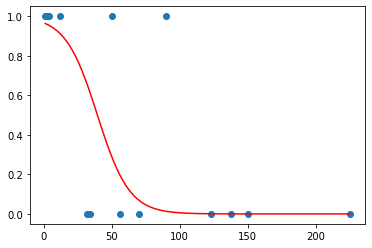

In [7]:
# x_values definieren um Logistische Regression zu zeichnen
x_values = np.linspace(np.min(x), np.max(x),100).reshape(-1,1)
# y_values = Wahrscheinlichkeit dass 1 ist. 
y_values = model.predict_proba(x_values)[:,1]

# Scatterplot mit Logistische Regression
plt.scatter(x,y)
plt.plot(x_values, y_values, c = "r")
plt.show()